<a href="https://colab.research.google.com/github/Kevin-Mora/Gauss-Seidel/blob/master/Reto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Bird Detector**

**1- Instalacion de paquetes cognitivos de vision**

In [ ]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

**2- Declaracion de librerias a utilizar**

In [4]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient      # Nos devolvuelve estatus
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes #Caracteristicas 
from msrest.authentication import CognitiveServicesCredentials                      #Valida los accesos

from array import array        # Para trabajar con los arreglos, vectorizarlos.
import os                      # Importar funcionalidades del sistema operativo.
from PIL import Image          # Python image library, para trabajar con imagenes.
import sys                     # trabajar con funcionalidades del sistema.
#import time                   # funcionalidades de tiempo
#from datetime import datetime #La ocupare para detectar el dia
from datetime import date
import matplotlib.pyplot as plt



**3- Inicializando el servicio de azure computer vision**

In [2]:
# Autenticamos el acceso con el tipo cliente para consumir el recurso(cognitive service)
# Declaramos las 2 variables que pide, los datos los tengo en  el portal  de azure donde 
# cree el servicio 

endpoint = "https://deepvision.cognitiveservices.azure.com/"
subscription_key = "bb547115c2aa4ff488eb867a77fff496"

# Nuestra  variable cliente connsumira nuestro  servicio
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

### Una vez autenticado  el servicio ya podemos analizar imagenes 

# Para analizar una imagen solo tenemos que poner el url de imagen como a continuación 

remote_image_url = "https://aviancontrolinc.com/wp-content/uploads/2017/06/iStock-466771492.jpg"



**4- Implementacion de azure computer vision** 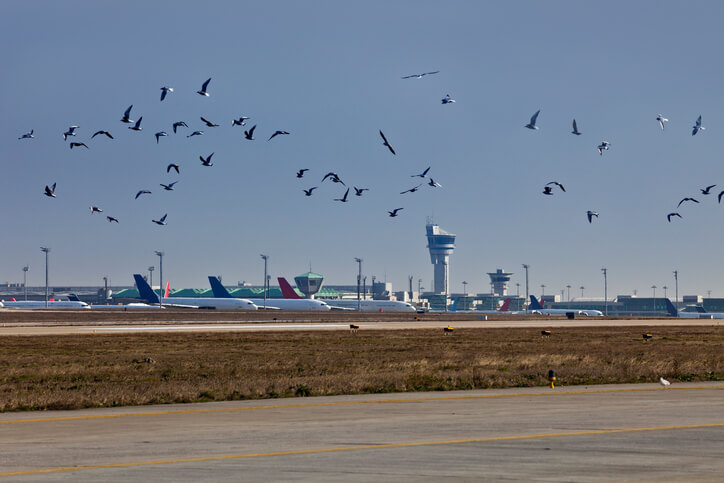

In [3]:
# Etiquetas de la imagen 

'''Busqueda de la etiqueta en especifico '''

# Variable tipo fecha del dia en que se ejecute, para la automatización
ahora = date.today() 


print("===== Imagen escaneada con visión por computadora =====")
# Call API with remote image
tags_result_remote = computervision_client.tag_image(remote_image_url )


# Detecta si el resultado tiene aves 
for tag in tags_result_remote.tags:
  if tag.name == 'bird':
    print("La fecha de el  " + str(ahora) + " hubo aves a la vista")
    print("con una seguridad del {:.1f}%".format(tag.confidence * 100))
  elif (len(tags_result_remote.tags) == 0):
    print("La fecha de el  " + str(ahora) + " no se percibieron aves")


===== Imagen escaneada con visión por computadora =====
La fecha de el  2021-03-06 hubo aves a la vista
con una seguridad del 99.5%
